In [5]:
from scipy.stats import entropy
import math
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10, 8]

In [6]:
def dist_hellinger(densities, N):
    uniform = 1 / N
    normalizing = math.sqrt(1 - math.sqrt(.5))
    
    bhatt_coeff = sum([np.sqrt(d * uniform) for d in densities])
    bhatt_coeff = np.clip(bhatt_coeff, 0, 1)
    
    dist = np.sqrt(1 - bhatt_coeff)
    return dist / normalizing


def dist_total_variation(densities, N):
    uniform = 1 / N
    return sum([abs(d - uniform) for d in densities])


def flipping_score_of_rank(densities, r, dist_fn):
    N = len(densities)
    copy = list(densities)
    
     # Add dummy zeros when rank is larger than number density entries.
    if r > N:
        copy.extend([0] * (r - N))
        
    copy.sort(reverse=True)
    dist = dist_fn(copy[:r], r)
    return 1 - dist


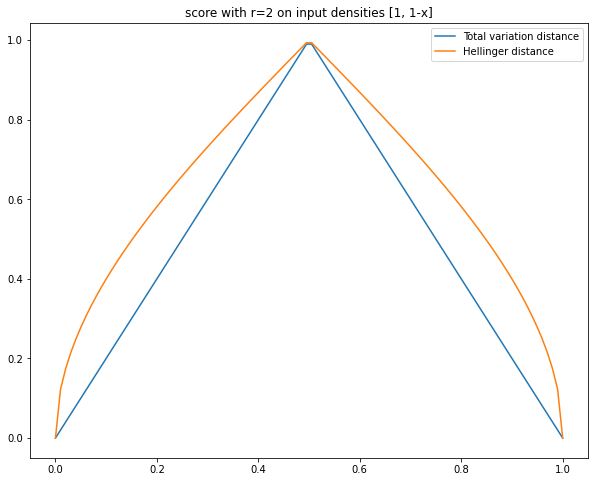

In [7]:
X = np.linspace(0, 1, 100)
Y1 = [flipping_score_of_rank([x, 1-x], r=2, dist_fn=dist_total_variation) for x in X]
Y2 = [flipping_score_of_rank([x, 1-x], r=2, dist_fn=dist_hellinger) for x in X]
    
plt.plot(X, Y1, '-', label='Total variation distance')
plt.plot(X, Y2, '-', label='Hellinger distance')
plt.title('score with r=2 on input densities [1, 1-x]')
plt.legend()
plt.show()

In [8]:
N = 3
M = 3
c = 0.01

a = [((1-c)/ N)]*N + M*[(c/M)]

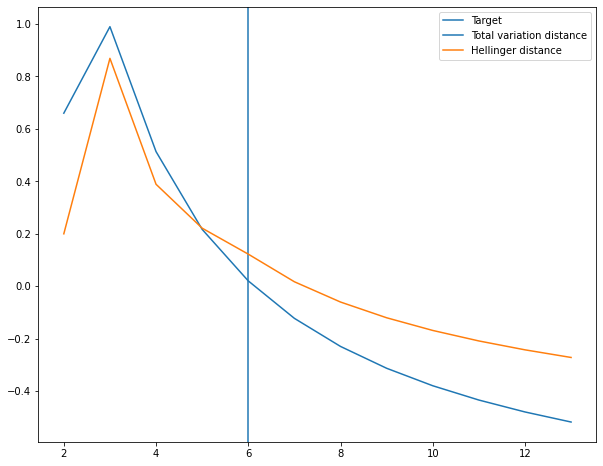

In [9]:
X = range(2, 2*(N+M+1))
Y1 = [flipping_score_of_rank(a, r, dist_fn=dist_total_variation) for r in X]
Y2 = [flipping_score_of_rank(a, r, dist_fn=dist_hellinger) for r in X]
    
plt.axvline(x=N+M, label='Target')
plt.plot(X, Y1, '-', label='Total variation distance')
plt.plot(X, Y2, '-', label='Hellinger distance')
plt.legend()
plt.show()

In [14]:
flipping_score_of_rank([], 2,  dist_fn=dist_hellinger)

-0.8477590650225737

In [15]:
flipping_score_of_rank([0.3, 0.3, 0.3, 0.1], 3, dist_fn=dist_hellinger)

0.5814236273125372